This is assignment #3 of the Machine Learning course
Done by Wania Naeem, 22i-2369

Part 1 - Model Training ------------------

-> Dataset (Kaggle - Ice cream sold vs Temperature): https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression

- Features: Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced.
- Output: Performace Index

In [12]:
#  kaggle datasets download -d mirajdeepbhandari/polynomial-regression

# Extracting the dataset after downloading it with the above command
import zipfile

with zipfile.ZipFile("polynomial-regression.zip", 'r') as zip_ref:
    zip_ref.extractall("ice-cream_data")


Dataset visualization

In [13]:
import os
import pandas as pd

dataset = pd.read_csv("ice-cream_data/Ice_cream selling data.csv")
dataset.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


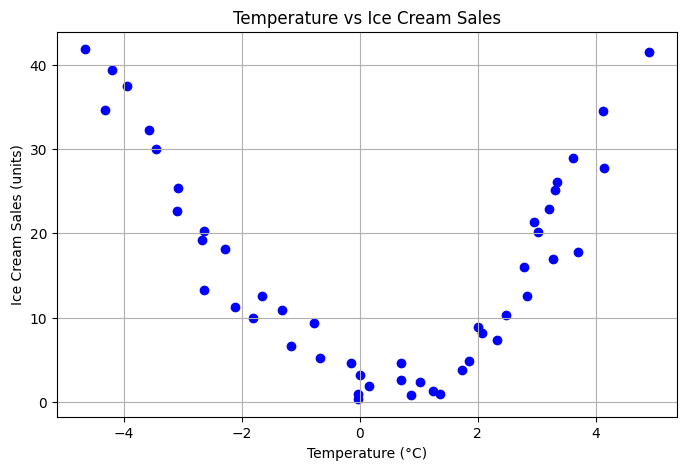

In [19]:
# Now to plot the scatter plot + regression line of this data to get an idea of the trend.
# This will be done on each feature.

from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(42)
target = 'Ice Cream Sales (units)'
feature = 'Temperature (°C)'

plt.figure(figsize=(8, 5))
plt.scatter(dataset[feature], dataset[target], color='blue')
plt.title('Temperature vs Ice Cream Sales')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.grid(True)
plt.show()


Early stopping at epoch 10 due to no improvement.


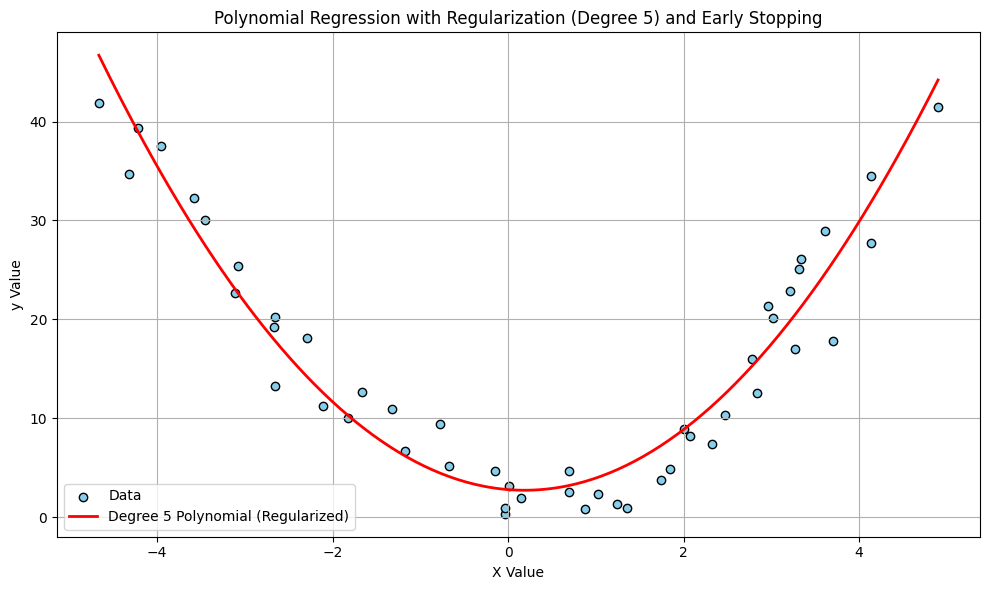

Test Mean Squared Error (MSE): 14.87905439926287


In [50]:
# Since the plot gives a polynomial shape for the dataset, I will apply Polynomial Regression on this dataset

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = dataset[feature].values.reshape(-1,1)
y = dataset[target].values.reshape(-1,1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply L2 Regularization
ridge_model = Ridge(alpha = 1.0)

# for early stopping
patience = 10 
best_loss = float('inf')
epochs_without_improvement = 0

max_epochs = 1000
for epoch in range(max_epochs):
    ridge_model.fit(X_train_poly, y_train)
    
    # Calculate loss (MSE) on the training set
    y_train_pred = ridge_model.predict(X_train_poly)
    train_loss = mean_squared_error(y_train, y_train_pred)
    
    # Check if the loss improved
    if train_loss < best_loss:
        best_loss = train_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
    
    # Early stopping condition
    if epochs_without_improvement >= patience:
        print(f"Early stopping at epoch {epoch} due to no improvement.")
        break


y_pred = ridge_model.predict(X_test_poly)

# Plotting the results
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = ridge_model.predict(X_range_poly)

# Plot the dataset and the polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='skyblue', edgecolor='black', label='Data')
plt.plot(X_range, y_range_pred, color='red', label='Degree 5 Polynomial (Regularized)', linewidth=2)

# Final touches
plt.title('Polynomial Regression with Regularization (Degree 5) and Early Stopping')
plt.xlabel('X Value')
plt.ylabel('y Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate the model's performance on the test set
test_loss = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error (MSE): {test_loss}")


In [ ]:
# Also implementing this code using gradient descent variants (Batch, mini-batch and stohastic)

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

degree = 5
poly_2 = PolynomialFeatures(degree)
scaler = StandardScaler()

X_train_poly = scaler.fit_transform(poly_2.fit_transform(X_train))
X_test_poly = scaler.transform(poly_2.transform(X_test))

In [ ]:
# Batch Gradient Descent
# We are only use ridge regression because, there is only 1 feature so lasso is not the best here!

sgd_batch = SGDRegressor(
    penalty='l2',      
    alpha=0.01,
    learning_rate='constant',
    eta0=0.001,
    max_iter=1000,
    random_state=42
)

# Batch: fit on the entire dataset
sgd_batch.fit(X_train_poly, y_train)

In [ ]:
# Stohastic Gradient Descent

sgd_stochastic = SGDRegressor(
    penalty='l2',
    alpha=0.01,
    learning_rate='constant',
    eta0=0.001,
    max_iter=1,
    warm_start=True,
    random_state=42
)

for epoch in range(1000):
    for i in range(X_train_poly.shape[0]):
        sgd_stochastic.partial_fit(X_train_poly[i:i+1], y_train[i:i+1])


In [ ]:
# Mini batch Learning

sgd_minibatch = SGDRegressor(
    penalty='l2',
    alpha=0.01,
    learning_rate='constant',
    eta0=0.001,
    max_iter=1,
    warm_start=True,
    random_state=42
)

batch_size = 16
n_epochs = 1000
n_samples = X_train_poly.shape[0]

for epoch in range(n_epochs):
    indices = np.random.permutation(n_samples)
    X_shuffled = X_train_poly[indices]
    y_shuffled = y_train[indices]
    
    for i in range(0, n_samples, batch_size):
        end = i + batch_size
        X_batch = X_shuffled[i:end]
        y_batch = y_shuffled[i:end]
        sgd_minibatch.partial_fit(X_batch, y_batch)


In [ ]:
# Getting the metrics to judge the models

print("MSE - Batch GD:", mean_squared_error(y_test, sgd_batch.predict(X_test_poly)))
print("MSE - SGD:", mean_squared_error(y_test, sgd_stochastic.predict(X_test_poly)))
print("MSE - Mini-Batch GD:", mean_squared_error(y_test, sgd_minibatch.predict(X_test_poly)))

Part 2: Uploading on Hugging Face -----------------------------------------------

In [51]:
# Saving the model

import joblib

joblib.dump(ridge_model, "poly_model.pkl")

['poly_model.pkl']